# EDA with Python and applying Logistic Regression

#### I am working on the TITANIC DATASET

## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

In [121]:
train=pd.read_csv('titanic_train.csv')

In [122]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis

### 1.Understanding missing data

#### We use Seaborn to create a simple heatmap to see where we are missing data!

In [8]:
train.isnull()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

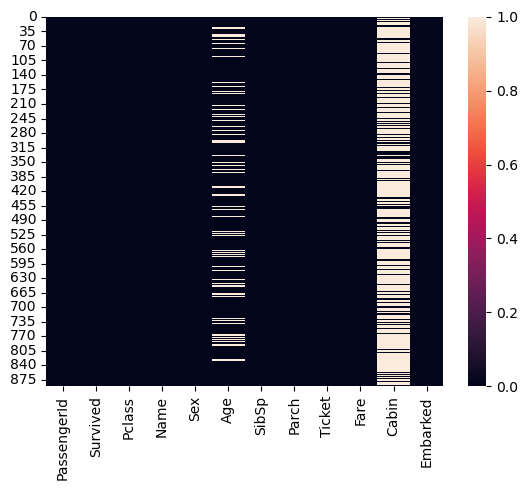

In [70]:
sns.heatmap(train.isnull())

#### Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

<Axes: xlabel='Survived', ylabel='count'>

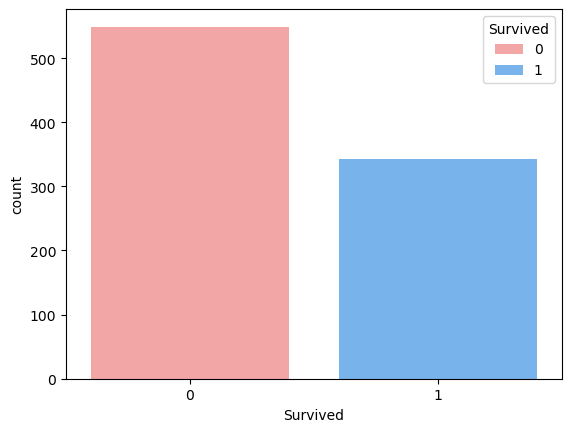

In [19]:

# sns.countplot(x='Survived', data=train, palette=['#ff9999', '#66b3ff'])
sns.countplot(x='Survived', hue='Survived', data=train, palette=['#ff9999', '#66b3ff'])

#### Note- 0 represents number of people died. 1 represent number of people alive

<Axes: xlabel='Survived', ylabel='count'>

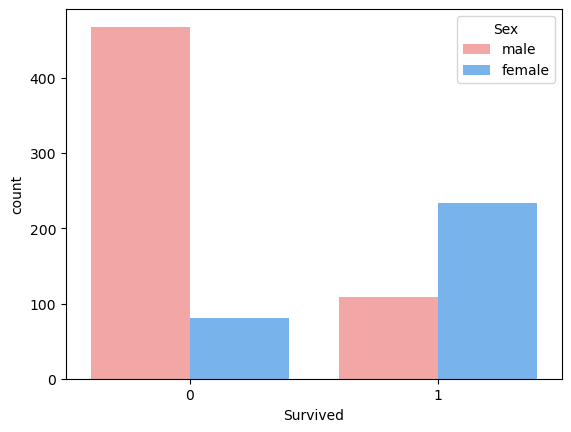

In [22]:
sns.countplot(x='Survived', hue='Sex', data=train, palette=['#ff9999', '#66b3ff'])

#### More Male Died as compared to Females

<Axes: xlabel='Survived', ylabel='count'>

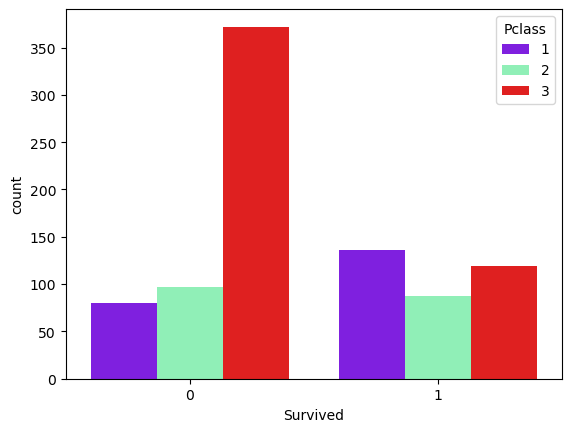

In [25]:
sns.countplot(x='Survived', hue='Pclass' , data=train , palette='rainbow')

#### least number of Passenger Class 1 people died.
#### Maximum number of Passenger class 3 people died.

C:\Users\Arnav Mehta\AppData\Local\Temp\ipykernel_11524\3253035107.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)


<Axes: xlabel='Age'>

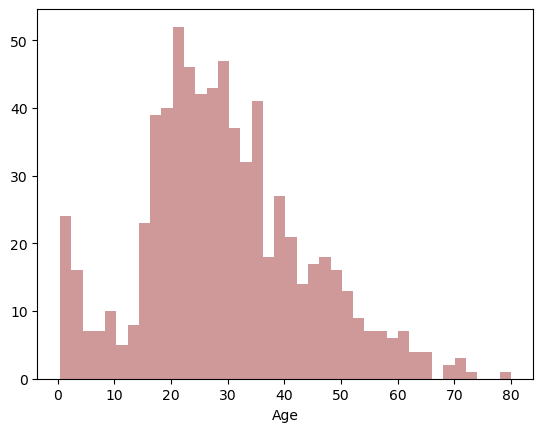

In [28]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)


#### Average age was between 17 to 30

##### using matplotlib-

<Axes: >

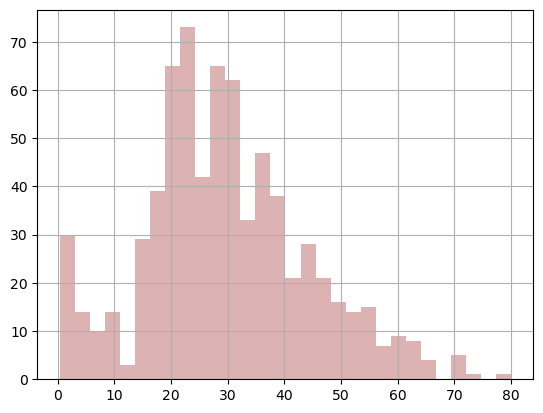

In [29]:
train['Age'].hist(bins=30,color='darkred',alpha=0.3)


<Axes: xlabel='SibSp', ylabel='count'>

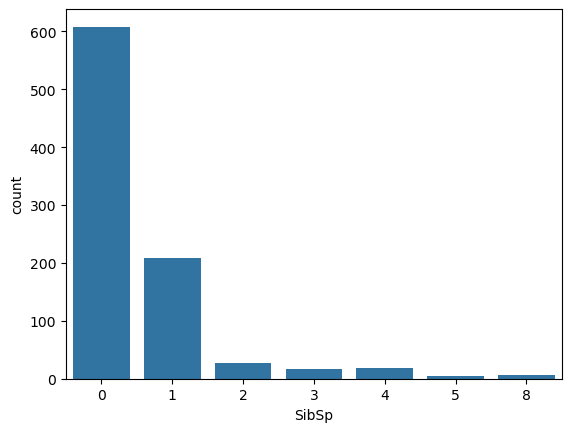

In [30]:
sns.countplot(x='SibSp',data=train)

<Axes: >

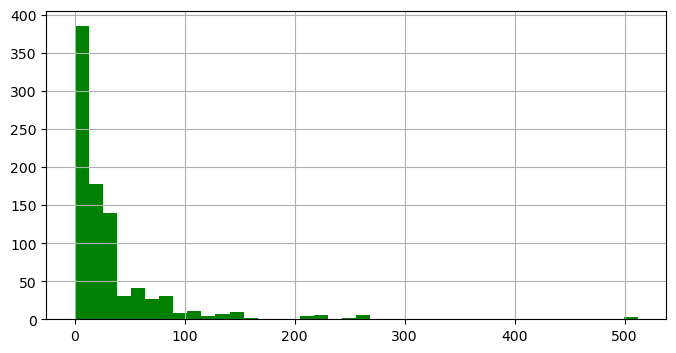

In [33]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))


## Data Cleaning


##### We want to fill in missing age data instead of just dropping the missing age data rows. 

##### One way to do this is by filling in the mean age of all the passengers (imputation). 

##### However we can be smarter about this and check the average age by passenger class. 

##### For example:

C:\Users\Arnav Mehta\AppData\Local\Temp\ipykernel_11524\1285741165.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

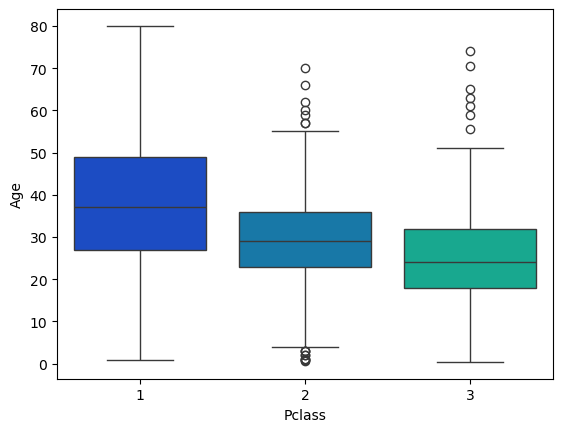

In [34]:
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

#### We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [123]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [124]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)


C:\Users\Arnav Mehta\AppData\Local\Temp\ipykernel_11524\552058130.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age=cols[0]
C:\Users\Arnav Mehta\AppData\Local\Temp\ipykernel_11524\552058130.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass=cols[1]


<Axes: >

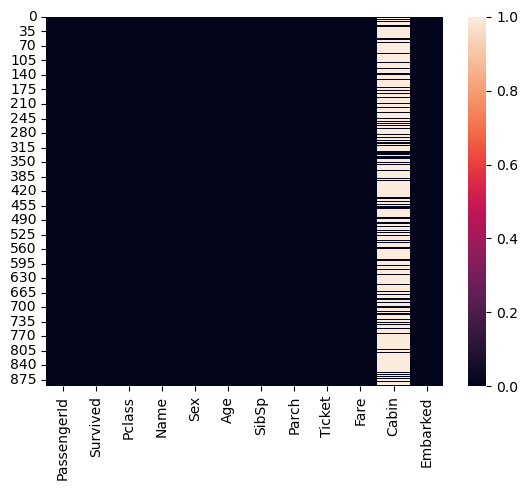

In [125]:
sns.heatmap(train.isnull())


#### Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [126]:
train.drop('Cabin',axis=1,inplace=True)

In [127]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [128]:
train.dropna(inplace=True)


<Axes: >

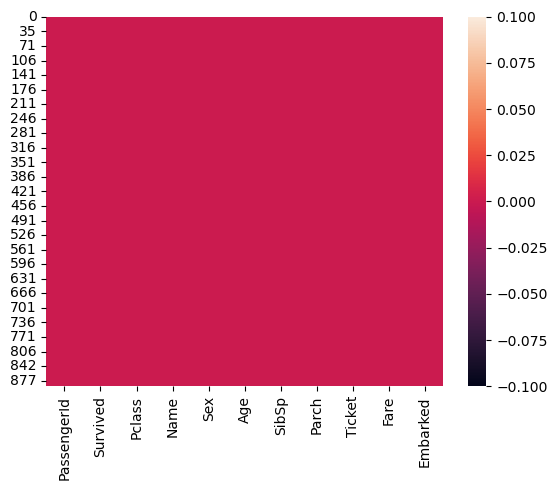

In [129]:
sns.heatmap(train.isnull())


## Cleaned Data 

## Converting Categorical Features


##### We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [117]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [118]:
pd.get_dummies(train['Embarked'],drop_first=True).head()


,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [130]:
import pandas as pd

# Example data
# train = pd.read_csv('train.csv')

# Drop rows with missing values
train.dropna(inplace=True)

# Convert 'Sex' column to dummy variables, dropping the first category
sex_dummies = pd.get_dummies(train['Sex'], drop_first=True)

# Convert 'Embarked' column to dummy variables, dropping the first category
embark_dummies = pd.get_dummies(train['Embarked'], drop_first=True)

# Drop the original 'Sex' and 'Embarked' columns along with 'Name' and 'Ticket'
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

# Concatenate the dummy variables to the original DataFrame
train = pd.concat([train, sex_dummies.astype(float), embark_dummies.astype(float)], axis=1)

# Display the first few rows of the resulting DataFrame
print(train.head())



   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male    Q    S
0            1         0       3  22.0      1      0   7.2500   1.0  0.0  1.0
1            2         1       1  38.0      1      0  71.2833   0.0  0.0  0.0
2            3         1       3  26.0      0      0   7.9250   0.0  0.0  1.0
3            4         1       1  35.0      1      0  53.1000   0.0  0.0  1.0
4            5         0       3  35.0      0      0   8.0500   1.0  0.0  1.0


Great! Our data is ready for our model!



# Building a Logistic Regression model


#### Here , Survived is the dependent variable, and rest all are independent.

In [132]:
train.drop('Survived',axis=1).head()


,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,2,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,3,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,4,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,5,3,35.0,0,0,8.0500,1.0,0.0,1.0


In [133]:
train['Survived'].head()


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [134]:
from sklearn.model_selection import train_test_split


In [135]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

# Training and Predicting

In [136]:
from sklearn.linear_model import LogisticRegression


In [138]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [139]:
predictions = logmodel.predict(X_test)


In [140]:
from sklearn.metrics import confusion_matrix


In [141]:
accuracy=confusion_matrix(y_test,predictions)


In [142]:
accuracy


array([[149,  14],
       [ 33,  71]], dtype=int64)

In [143]:
from sklearn.metrics import accuracy_score


In [144]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8239700374531835

In [145]:
predictions


array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)